
# 1. Introduction

Credit scoring is a critical process for financial institutions, enabling them to evaluate the risk associated with lending money to applicants. This process is influenced by various factors, including an applicant's financial history, current financial status, and personal circumstances. Among these personal circumstances, the marital status and the number of children an applicant has are believed to impact their probability of defaulting on a loan. This report aims to analyze the correlation between these personal factors and loan default probabilities, providing insights that could enhance the credit evaluation process.

## 1.1 Objectives:

The primary objective of this report is to examine how an applicant's marital status and the number of children they have affect their likelihood of failing to repay a loan. By analyzing existing data on borrower characteristics and loan repayment outcomes, the report seeks to:

1. Identify and address missing or inaccurate data that could skew the analysis.
2. Assess the impact of marital status and the number of children on loan default risk.
3. Provide recommendations for incorporating these insights into the credit scoring process.

This analysis will help the bank refine its credit assessment criteria, potentially leading to more informed lending decisions and reduced default rates.

## 1.2 Stages:

* Stage 1: Data Inspection and Preprocessing
  * Opening and Reading Dataset: The first step involves opening the '/content/drive/MyDrive/DATASET PROJECT/2. Analyzing the risk of borrower default/credit_scoring_eng.csv' file to read and understand the structure and content of the dataset.
  * Pre-processing Tasks:
    * Identifying Missing Values: Determine the presence of any missing values in the dataset, which are crucial to address as they can lead to inaccurate analyses.
    * Filling Missing Values: Devise and implement a strategy for filling in missing values, considering the nature of the data and the potential impact on the analysis.
    * Converting Data Types: Assess and convert any real number data types to integer types to simplify analysis and reduce computational complexity.
    * Removing Duplicate Data: Identify and remove any duplicate entries to ensure the uniqueness of the dataset, which is critical for the integrity of the analysis.
    * Categorizing Data: Organize data into meaningful categories that will facilitate analysis, especially for assessing the impact of marital status and the number of children on loan default rates.

* Stage 2: Analysis
  * Correlation Between Children and Loan Default Probability: Analyze the relationship between the number of children a borrower has and their likelihood of defaulting on a loan.
  * Impact of Marital Status on Loan Default Probability: Examine how an applicant's marital status may influence their risk of failing to repay a loan.
  * Income Level and Loan Default Probability: Assess whether there's a correlation between an applicant's income level and their probability of loan default.
  * Loan Purpose and Default Probability: Explore how the purpose for which a loan is taken affects the likelihood of loan default.

* Stage 3: Conclusions

Summarize the findings from the analysis, highlighting the impact of marital status and the number of children on loan default probabilities. Offer recommendations for the bank on how to integrate these insights into their credit scoring model to make more accurate predictions of loan repayment behavior.

The report will provide a comprehensive view of how personal factors such as marital status and the number of children correlate with loan repayment risks, ultimately aiding the bank in refining their credit evaluation processes.

# Stage 1: Data Inspection and Preprocessing
## Opening and Reading Dataset

Open the credit assessment-related data, then study the data.

Start by importing libraries and loading the data. You may realize that you need additional libraries as you work on this project, and that's perfectly normal.

In [1]:
# Load all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
df = pd.read_csv('/content/drive/MyDrive/DATASET PROJECT/2. Analyzing the risk of borrower default/credit_scoring_eng.csv')

In [3]:
# Let's see how many rows and columns our dataset has
df.shape

(21525, 12)

In [4]:
# Let's display the first N rows.

df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


In [5]:
# Retrieve data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


From the information above, we obtain several insights. Our dataset consists of 12 columns and 21525 rows.

Based on the documentation:

* children: the number of children in the family
* days_employed: how long the customer has been employed
* dob_years: the age of the customer
* education: the education level of the customer
* education_id: an identifier for the education level of the customer
* family_status: the marital status of the customer
* family_status_id: an identifier for the marital status of the customer
* gender: the gender of the customer
* income_type: the income type of the customer
* debt: whether the customer has ever defaulted on a loan
* total_income: monthly income
* purpose: the reason for taking out the loan

From the displayed columns, we can see some issues:

* The days_employed column has negative values, which can be converted to positive.
* The education column contains some names written in uppercase and some in lowercase; we can convert them all to lowercase.
* The total_income column should not be defined as a float but rather an integer.
* We can also see that there are different numbers of values between columns. This indicates that our data contains missing values.


**Conclusion**

Each row in the table stores data related to each customer. Several columns hold data that describe the customers themselves: the number of children in the customer's family, how long the customer has been employed, the age of the customer, the education level of the customer, an identifier for the education level of the customer, the marital status of the customer, an identifier for the marital status of the customer, the gender of the customer, and the income type of the customer. The rest store data related to customer information: whether the customer has ever defaulted on a loan, the customer's monthly income, and the reason for the customer taking out the loan.

It is evident that the data we have is sufficient to test hypotheses. Unfortunately, there are some missing values.

To continue the analysis, we need to preprocess the data first.

##  Pre-processing Tasks

Handling missing values, fixing formats in problematic columns, then checking for any duplicate data. After that, categorize the data to facilitate hypothesis analysis.


### Identifying Missing Values
First, find the number of missing values in the table that has been filtered with missing values in the first column containing missing data.

In [6]:
# Let's take a look at the table that has been filtered with missing values in the first column containing missing data
df.loc[df['days_employed'].isnull()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


Not all missing values affect your research. However, missing values in the total_income column can affect the relationship between income level and the probability of a customer defaulting on a loan.

We're not yet sure if these missing values appear symmetrically or not. However, for every missing value in the days_employed column, there is also a missing value in the total_income column.

Further investigation is needed, including counting the missing values in all rows with missing values to ensure that the missing samples are of the same size.

In [7]:
# Let's apply some conditions to filter the data and see the number of rows in the filtered table.

df.isnull().sum().sort_values(ascending=False)

days_employed       2174
total_income        2174
children               0
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
purpose                0
dtype: int64

In [8]:
df.isnull().sum() / len(df) * 100

children             0.000000
days_employed       10.099884
dob_years            0.000000
education            0.000000
education_id         0.000000
family_status        0.000000
family_status_id     0.000000
gender               0.000000
income_type          0.000000
debt                 0.000000
total_income        10.099884
purpose              0.000000
dtype: float64

**Temporary Conclusion**

The number of rows in the filtered table matches the number of missing values, which is 2174 rows. Thus, we can conclude that the missing samples have the same size.

The percentage of missing values in the days_employed and total_income columns compared to the overall dataset is 10.09%. The missing values constitute a significant portion of the data. Therefore, we should consider filling in the missing values. To do this, firstly, we need to consider whether the missing data could be caused by specific customer characteristics, such as job type or others. We also need to decide which characteristics we believe may be the cause. Secondly, we need to check if there is any dependence of missing values on other indicator values with columns identifying specific customer characteristics.

In [9]:
# Let's examine customers who do not have data on identified characteristics and columns with missing values
df.isnull().sum().sort_values(ascending=False)


days_employed       2174
total_income        2174
children               0
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
purpose                0
dtype: int64

In [10]:
# Create a variable named "missing_data" based on the columns "days_employed" and "total_income" which have missing values.
df_null = df.loc[(df['days_employed'].isnull()) & (df['total_income'].isnull())].reset_index(drop=True)

In [11]:
df_null.shape

(2174, 12)

In [12]:
df_null.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
1,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
2,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
3,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
4,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding


In [13]:
# Check its distribution
df_null['education'].value_counts(normalize=True)

secondary education    0.647654
bachelor's degree      0.228151
SECONDARY EDUCATION    0.030819
Secondary Education    0.029899
some college           0.025299
Bachelor's Degree      0.011500
BACHELOR'S DEGREE      0.010580
primary education      0.008740
Some College           0.003220
SOME COLLEGE           0.003220
Primary Education      0.000460
PRIMARY EDUCATION      0.000460
Name: education, dtype: float64

In [14]:
df_null['income_type'].value_counts(normalize=True)

employee         0.508280
business         0.233671
retiree          0.189972
civil servant    0.067617
entrepreneur     0.000460
Name: income_type, dtype: float64

In [15]:
df_null['debt'].value_counts(normalize=True)

0    0.921803
1    0.078197
Name: debt, dtype: float64

Looking at the distribution of other columns such as education, income_type, and debt in the missing data variable, we haven't been able to determine the possible causes of missing values in the data. Whether the missing values are random or there may be a specific pattern.

Thus, we need to check whether the missing values are random or there is a specific pattern.

By comparing the distribution of the missing data variable with the overall dataset.

In [16]:
# Check the distribution across the entire dataset.

df['education'].value_counts(normalize=True)

secondary education    0.638792
bachelor's degree      0.219187
SECONDARY EDUCATION    0.035865
Secondary Education    0.033031
some college           0.031034
BACHELOR'S DEGREE      0.012729
Bachelor's Degree      0.012451
primary education      0.011614
Some College           0.002184
SOME COLLEGE           0.001347
PRIMARY EDUCATION      0.000790
Primary Education      0.000697
graduate degree        0.000186
Graduate Degree        0.000046
GRADUATE DEGREE        0.000046
Name: education, dtype: float64

In [17]:
df['income_type'].value_counts(normalize=True)

employee                       0.516562
business                       0.236237
retiree                        0.179141
civil servant                  0.067782
unemployed                     0.000093
entrepreneur                   0.000093
student                        0.000046
paternity / maternity leave    0.000046
Name: income_type, dtype: float64

In [18]:
df['debt'].value_counts(normalize=True)

0    0.919117
1    0.080883
Name: debt, dtype: float64

**Temporary Conclusion**

The distribution in the original dataset differs from the distribution in the filtered table. We haven't been able to draw any conclusions yet, so we need to investigate the dataset further. Let's consider other reasons that could cause missing data and check if we can find specific patterns that lead us to believe that the missing values are not occurring randomly.

In [19]:
# Examine other causes and patterns that could result in missing values.
df_null[df_null['income_type'] == 'employee']['children'].value_counts(normalize=True)

 0     0.589140
 1     0.252489
 2     0.123982
 3     0.026244
 4     0.003620
 20    0.002715
 5     0.000905
-1     0.000905
Name: children, dtype: float64

In [20]:
df[df['income_type'] == 'employee']['children'].value_counts(normalize=True)

 0     0.593579
 1     0.259646
 2     0.118446
 3     0.018797
 20    0.003867
 4     0.002788
-1     0.002338
 5     0.000540
Name: children, dtype: float64

**Temporary Conclusion**

In the end, we can ascertain that the missing values are indeed randomly occurring and not influenced by any specific pattern. This is evident from all the distributions conducted.

**Conclusion**

Considering the distribution of other columns in the missing data variable and the distribution in the original dataset, as well as examining other causes and patterns that could result in missing values, we haven't been able to find a specific pattern. Therefore, it can be concluded that the missing values are random.

These missing values will be filled in after further consideration.

Before filling in the missing values, we need to transform our dataset. We need to address several other types of issues such as duplicates, inconsistent recordings, and incorrect data sources. Only after this should we decide how to fill in the missing values.

Inspect each column to identify potential issues in each column.

Start by removing duplicates.

### Removing Duplicate Data
Now that you've been able to identify missing values, it's time to address other common issues found in the data preprocessing stage: duplicate values.

To find duplicate data, there are two effective methods. We can use the duplicated() method along with sum() to obtain the number of duplicated values in a single column or to obtain duplicated rows in a DataFrame.

In [21]:
df.duplicated().sum()

54

In [22]:
df_new = df.drop_duplicates().reset_index(drop=True)

In [23]:
df_new.duplicated().sum()

0

### Converting Data Types

Based on the previous information, the first issue that arises is the writing style in the education column, so we need to fix its formatting. Additionally, we need to change the data type from floating-point to integer in the total_income column.

Next, we need to inspect each column in the dataset to see what issues each column may have and address them if necessary.

In [24]:
# Let's look at all the values in the education column to check for spelling that needs to be corrected
df_new['education'].value_counts()

secondary education    13705
bachelor's degree       4710
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        273
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
Graduate Degree            1
GRADUATE DEGREE            1
Name: education, dtype: int64

In [25]:
# Correct the records if necessary.
df_new['education'] = df_new['education'].str.lower()

In [26]:
# Check all values in the column to ensure that we have corrected them properly.
df_new['education'].value_counts()

secondary education    15188
bachelor's degree       5251
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

In [27]:
# Let's look at the distribution of values in the children column.
df_new['children'].value_counts()

 0     14107
 1      4809
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [28]:
len(df_new.loc[(df_new['children'] == -1)]) / len(df_new['children']) *100

0.21889991150854643

In [29]:
len(df_new.loc[(df_new['children'] == 20)]) / len(df_new['children']) *100

0.35396581435424523

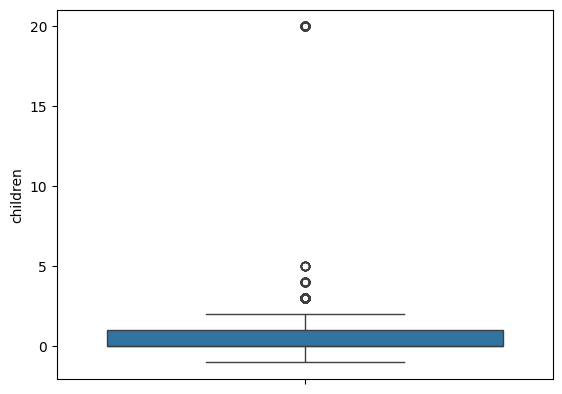

In [30]:
sns.boxplot(df_new['children']);

There are anomalies in the children column, specifically the presence of the number '-1' and the number '20' for the number of children. The percentage of problematic data is 0.21 and 0.35, respectively. This may be incorrect information. Considering the small percentage, it won't have much impact on the data if we change them to the numbers '1' and '2'.

In [31]:
# Correct the data based on your decision.
df_new['children'] = df_new['children'].replace(-1, 1)
df_new['children'] = df_new['children'].replace(20, 2)

In [32]:
# Double-check the children column to ensure that everything has been corrected.
df_new['children'].value_counts()

0    14107
1     4856
2     2128
3      330
4       41
5        9
Name: children, dtype: int64

The issue with the days_employed column is that there are negative values in the number of days. We know that the number of days cannot be negative. This is also an indication of incorrect information.

In [33]:
# Identify problematic data in the days_employed column if there are issues and calculate the percentage.
df_new['days_employed'].value_counts()

-8437.673028      1
-3507.818775      1
 354500.415854    1
-769.717438       1
-3963.590317      1
                 ..
-1099.957609      1
-209.984794       1
 398099.392433    1
-1271.038880      1
-1984.507589      1
Name: days_employed, Length: 19351, dtype: int64

The number of problematic data is quite high, which may be due to several technical issues. We may need to propose the clearest reasons why this can happen and how the correct data should be, considering we cannot delete these problematic rows.

To convert all negative data to positive, we need to use the 'abs' absolute command in pandas.

In [34]:
# Address the problematic values, if any.
df_new['days_employed'] = abs(df_new['days_employed'])

In [35]:
# Check the result - make sure the issue has been resolved.
df_new['days_employed'].value_counts()

8437.673028      1
3507.818775      1
354500.415854    1
769.717438       1
3963.590317      1
                ..
1099.957609      1
209.984794       1
398099.392433    1
1271.038880      1
1984.507589      1
Name: days_employed, Length: 19351, dtype: int64

In [36]:
df_new[df_new['days_employed'] < 0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


In [37]:
df_new['years_employed'] = df_new['days_employed'] / 365

In [38]:
df_new.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.116912
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.026860
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.406637
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.300677
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235814


For employment duration (years_employed) of more than 30 years, it can be considered unusual. This is because the average retirement age is around 50 years old and people usually start working after the age of 20. Therefore, the maximum employment duration is likely to be 30 years.

In [39]:
df_new.loc[df_new['years_employed']>30]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235814
18,0,400281.136913,53,secondary education,1,widow / widower,2,F,retiree,0,9091.804,buying a second-hand car,1096.660649
24,1,338551.952911,57,secondary education,1,unmarried,4,F,retiree,0,46487.558,transactions with commercial real estate,927.539597
25,0,363548.489348,67,secondary education,1,married,0,M,retiree,0,8818.041,buy real estate,996.023258
30,1,335581.668515,62,secondary education,1,married,0,F,retiree,0,27432.971,transactions with commercial real estate,919.401832
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21451,0,338904.866406,53,secondary education,1,civil partnership,1,M,retiree,0,12070.399,to have a wedding,928.506483
21454,0,386497.714078,62,secondary education,1,married,0,M,retiree,0,11622.175,property,1058.897847
21455,0,362161.054124,59,bachelor's degree,0,married,0,M,retiree,0,11684.650,real estate transactions,992.222066
21464,0,373995.710838,59,secondary education,1,married,0,F,retiree,0,24618.344,purchase of a car,1024.645783


In [40]:
df_new_years30 = df_new.loc[df_new['years_employed']<30]

In [41]:
days_employed_median = df_new_years30['days_employed'].median()

In [42]:
df_new.loc[df_new['years_employed']>30, 'days_employed'] = days_employed_median

In [43]:
df_new['years_employed'] = df_new['days_employed'] / 365

In [44]:
df_new.loc[df_new['years_employed']>30]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed


Now, let's examine the age of the customers and check if there are any issues there. Once again, think about the potential anomalies that we might encounter in this column, such as unrealistic age numbers.

In [45]:
# Check dob_years for suspicious values and calculate the percentage.
sorted(df_new['dob_years'].unique())

[0,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75]

We have found anomalies in this column, namely unrealistic age numbers such as 0 years. This may occur because some customers did not provide their age. For now, we will remove them from the dataset.

In [46]:
# Address the issue in the dob_years column, if there is a problem.
df_new_2 = df_new[df_new['dob_years'] != 0].reset_index(drop=True)

In [47]:
# Check the result - make sure the issue has been resolved.
sorted(df_new_2['dob_years'].unique())

[19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75]

Now, it's time to examine the family_status column.

In [48]:
# Let's look at the values for this column.
df_new_2['family_status'].value_counts()

married              12295
civil partnership     4142
unmarried             2794
divorced              1185
widow / widower        954
Name: family_status, dtype: int64

The values contained in this column are a list of the customer's family statuses, and there are no issues to be addressed in this column.

Now, it's time to examine the gender column.

In [49]:
# Let's see the values in this column.
df_new_2['gender'].value_counts()

F      14117
M       7252
XNA        1
Name: gender, dtype: int64

The values contained in this column are a list of the customer's genders. The issue that may need to be addressed is 'XNA' in the output above, which may be due to a third gender or incorrect information during data entry.

For now, we will remove it from the data.

In [50]:
drop_index = df_new_2[df_new_2['gender']=='XNA'].index

In [51]:
# Address problematic values, if any.
df_new_3 = df_new_2.drop(drop_index).reset_index(drop=True)

In [52]:
# Check the result - ensure that the issue has been resolved.
df_new_3['gender'].value_counts()

F    14117
M     7252
Name: gender, dtype: int64

Now, it's time to examine the income_type column.

In [53]:
# Let's look at the values in this column.
df_new_3['income_type'].value_counts()

employee                       11036
business                        5059
retiree                         3817
civil servant                   1451
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

In [54]:
# Check the size of the dataset you now have after the first manipulation you performed.
df_new_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21369 entries, 0 to 21368
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21369 non-null  int64  
 1   days_employed     19259 non-null  float64
 2   dob_years         21369 non-null  int64  
 3   education         21369 non-null  object 
 4   education_id      21369 non-null  int64  
 5   family_status     21369 non-null  object 
 6   family_status_id  21369 non-null  int64  
 7   gender            21369 non-null  object 
 8   income_type       21369 non-null  object 
 9   debt              21369 non-null  int64  
 10  total_income      19259 non-null  float64
 11  purpose           21369 non-null  object 
 12  years_employed    19259 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 2.1+ MB


In [55]:
(len(df_new_3) - len(df)) / len(df) * 100

-0.7247386759581882

After data transformation, the following changes were observed:

1. Removing Duplicates: Initially, there were 54 duplicate entries, which were removed, resulting in a reduction of 0.25% of the original dataset.

2. Changing Data Types:

* In the 'education' column, standardization of values was done by converting them to lowercase, resulting in 5 unique categories.
* In the 'children' column, outliers (-1 and 20) were adjusted to more plausible values (1 and 2), affecting 0.22% and 0.35% of the dataset respectively.
* In the 'days_employed' column, negative values were converted to absolute values, and outliers (those with more than 30 years of employment) were replaced with the median value.
* In the 'dob_years' column, entries with the value 0 were removed.
* In the 'gender' column, an outlier ('XNA') was dropped.

Overall, the percentage change in the dataset size after transformation is approximately 0.7247%, indicating a slight reduction due to data cleaning and transformation processes.

### Filling Missing Values

To speed up work with some data, you may want to use a dictionary for some values that have IDs. The dictionary is quite practical to use to describe the individual characteristics of an object.*teks yang dimiringkan*

In [56]:
# Find dictionary
dict_edu = df_new_3[['education_id', 'education']].drop_duplicates().reset_index(drop=True)

In [57]:
dict_edu.to_dict(orient='records')

[{'education_id': 0, 'education': "bachelor's degree"},
 {'education_id': 1, 'education': 'secondary education'},
 {'education_id': 2, 'education': 'some college'},
 {'education_id': 3, 'education': 'primary education'},
 {'education_id': 4, 'education': 'graduate degree'}]

In [58]:
dict_edu = df_new_3[['family_status_id', 'family_status']].drop_duplicates().reset_index(drop=True)

In [59]:
dict_edu.to_dict()

{'family_status_id': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
 'family_status': {0: 'married',
  1: 'civil partnership',
  2: 'widow / widower',
  3: 'divorced',
  4: 'unmarried'}}

#### Fixed missing value in total_income
Each row in this dataset represents one customer. For each customer, we have data about the customer's children, the customer's length of service, the customer's age, the customer's education level, the customer's marital status, the customer's gender, the customer's type of income, whether the customer has ever defaulted, the customer's monthly income, and the reason for the customer's loan.

Again, we have missing values. Some customers have missing values for data related to the length of work and their monthly income.

The customer's length of service and the customer's monthly income are quantitative variables. Missing values for these variables must be processed differently and filled with representative values. The mean and median of the dataset are often used for these values.

The average or mean is the sum of all values divided by the number of values, while the median is the value in the middle when all values are ordered from smallest to largest.

Start by addressing the total value of lost revenue. Create age categories for customers. Create a new column containing age categories. This strategy can help to calculate the total value of income.

In [61]:
# Let's write a function to calculate age categories
def age_group(age):
  try:
    if age <= 17:
      return 'Young'
    elif 18 <= age <= 30:
      return 'Medium'
    elif 31 <= age <= 50:
      return 'Productive'
    else:
      return 'Old'
  except:
    return 'Unidentified'

In [62]:
# Perform testing to see whether your function works or not
age_group(42)

'Productive'

In [63]:
# Create a new column based on function
df_new_3['age_category'] = df_new_3['dob_years'].apply(age_group)

In [64]:
df_new_3.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,age_category
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.116912,Productive
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.026860,Productive
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.406637,Productive
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.300677,Productive
4,0,1607.082291,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,4.402965,Old


In [65]:
# Check how the values inside the new column look like
df_new_3['age_category'].value_counts()

Productive    10996
Old            6655
Medium         3718
Name: age_category, dtype: int64

Think about the factors on which income usually depends. Ultimately, we will know whether we should use the mean or median to replace the missing values. To make this decision, you may want to look at the distribution of the factors you identified as impacting a person's income.

Create a table that contains only data without missing values. This data will be used to correct missing values.

In [66]:
# Create a table with no missing values and display some of its rows to make sure everything is working properly
df_not_null = df_new_3[df_new_3['total_income'].notnull()].reset_index(drop=True)

In [67]:
# Pay attention to the average values for income based on the factors you have identified
age_income_mean = pd.pivot_table(df_not_null, index='age_category', values='total_income', aggfunc='mean').reset_index()
age_income_mean

,age_category,total_income
0,Medium,25815.651899
1,Old,24704.150073
2,Productive,28383.188755


In [68]:
# Pay attention to the median value for income based on the factors you have identified
age_income_median = pd.pivot_table(df_not_null, index='age_category', values='total_income', aggfunc='median').reset_index()
age_income_median

,age_category,total_income
0,Medium,22955.4740
1,Old,21310.9445
2,Productive,24711.8435


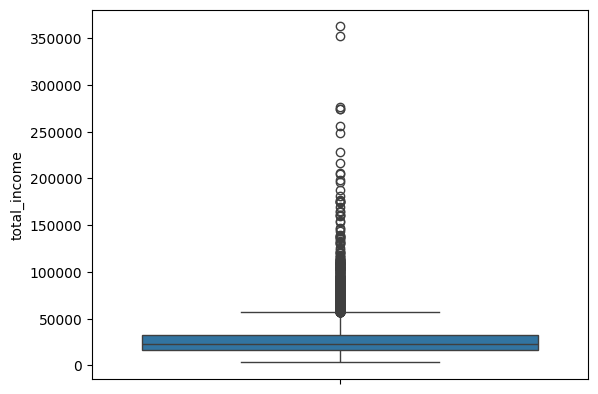

In [69]:
sns.boxplot(df_new_3['total_income']);

Repeat the comparison for various factors, ensuring that you consider different aspects and explain your thought process.

The characteristic that determines the monthly income of a customer is the age_category.

Given that there are significant outliers in the data, we can also use the median as our representative value.

In [70]:
#  Write a function that we will use to fill in the missing values
def fill_missing_value (dataframe, agg_column, value_column):

  grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
  size = len(grouped_values)

  for i in range(size):
    group = grouped_values[agg_column][i]
    value = grouped_values[value_column][i]
    dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
  return dataframe

In [71]:
grouped_values = df_new_3.groupby('income_type')['total_income'].median().reset_index()
size = len(grouped_values)

In [72]:
grouped_values

,income_type,total_income
0,business,27563.0285
1,civil servant,24083.5065
2,employee,22815.1035
3,entrepreneur,79866.1030
4,paternity / maternity leave,8612.6610
5,retiree,18969.1490
6,student,15712.2600
7,unemployed,21014.3605


In [73]:
# Check how the values inside the new column look like
df_new_4 = fill_missing_value(df_new_3, 'income_type', 'total_income')

In [74]:
df_new_4.isnull().sum().sort_values(ascending=False)

days_employed       2110
years_employed      2110
children               0
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
age_category           0
dtype: int64

In [75]:
# Apply the function to each line
df_new_3.groupby('income_type')['total_income'].median()

income_type
business                       27563.0285
civil servant                  24083.5065
employee                       22815.1035
entrepreneur                   79866.1030
paternity / maternity leave     8612.6610
retiree                        18969.1490
student                        15712.2600
unemployed                     21014.3605
Name: total_income, dtype: float64

In [76]:
df_new_3['total_income'].median()

22815.103499999997

In [77]:
# Check if we are getting any errors
df_new_4[df_new_4['days_employed'].isnull()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,age_category
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,18969.1490,to have a wedding,NaN,Old
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,24083.5065,education,NaN,Productive
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,18969.1490,building a real estate,NaN,Old
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,24083.5065,second-hand car purchase,NaN,Productive
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,18969.1490,to have a wedding,NaN,Old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21333,2,NaN,47,secondary education,1,married,0,M,business,0,27563.0285,purchase of a car,NaN,Productive
21339,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,22815.1035,wedding ceremony,NaN,Productive
21341,0,NaN,48,bachelor's degree,0,married,0,F,business,0,27563.0285,building a property,NaN,Productive
21346,1,NaN,42,secondary education,1,married,0,F,employee,0,22815.1035,building a real estate,NaN,Productive


Once you are done with the total_income, check whether the total number of values in this column matches the number of values in the other columns.
Now, it's time to check column the total_income .

In [78]:
df_new_3['total_income'].value_counts()

22815.1035    1072
27563.0285     501
18969.1490     391
24083.5065     145
17312.7170       2
              ... 
28156.7620       1
24931.1950       1
32346.5940       1
14039.8400       1
13127.5870       1
Name: total_income, Length: 19260, dtype: int64

In [79]:
df_new_3['total_income'] = df_new_3['total_income'].astype('int')

In [80]:
df_new_3['total_income'].value_counts()

22815    1073
27563     501
18969     391
24083     145
19552       7
         ... 
41514       1
45228       1
34624       1
27232       1
35966       1
Name: total_income, Length: 15336, dtype: int64

In [81]:
# Check the total number of entries in the column
df_new_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21369 entries, 0 to 21368
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21369 non-null  int64  
 1   days_employed     19259 non-null  float64
 2   dob_years         21369 non-null  int64  
 3   education         21369 non-null  object 
 4   education_id      21369 non-null  int64  
 5   family_status     21369 non-null  object 
 6   family_status_id  21369 non-null  int64  
 7   gender            21369 non-null  object 
 8   income_type       21369 non-null  object 
 9   debt              21369 non-null  int64  
 10  total_income      21369 non-null  int64  
 11  purpose           21369 non-null  object 
 12  years_employed    19259 non-null  float64
 13  age_category      21369 non-null  object 
dtypes: float64(2), int64(6), object(6)
memory usage: 2.3+ MB


#### Fixed value in days_employed
Think about parameters that can help you correct the missing values in this column. In the end, you will know whether you should use the mean or median to replace the missing values. You may need to do the same research you did when correcting the data in the previous column.

In [82]:
# Median distribution of `days_employed` based on the parameters you identified
age_days_employed_median = pd.pivot_table(df_not_null, index='age_category', values='days_employed', aggfunc='median').reset_index()
age_days_employed_median

,age_category,days_employed
0,Medium,1045.752744
1,Old,1607.082291
2,Productive,1737.769663


In [83]:
# Average distribution of `days_employed` based on the parameters you identified
age_days_employed_mean = pd.pivot_table(df_not_null, index='age_category', values='days_employed', aggfunc='median').reset_index()
age_days_employed_mean

,age_category,days_employed
0,Medium,1045.752744
1,Old,1607.082291
2,Productive,1737.769663


Considering that there are significant outliers in the data, we can use the median as our representative value.

In [84]:
# Let's write a function that calculates the mean or median (depending on your decision) based on the parameters you identified
def fill_missing_value (dataframe, agg_column, value_column):

  grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
  size = len(grouped_values)

  for i in range(size):
    group = grouped_values[agg_column][i]
    value = grouped_values[value_column][i]
    dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
  return dataframe

In [85]:
# Check whether your function is working
grouped_values = df_new_4.groupby('income_type')['days_employed'].median().reset_index()
size = len(grouped_values)

In [86]:
# Apply the function to income_type
df_new_5 = fill_missing_value(df_new_4, 'income_type', 'days_employed')

In [87]:
df_new_5['years_employed'] = df_new_5['days_employed'] / 365

In [88]:
# Check whether your function is working
df_new_5.isnull().sum().sort_values(ascending=False)

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
years_employed      0
age_category        0
dtype: int64

In [89]:
df_new_3['days_employed'] = df_new_3['days_employed'].astype('int')

In [90]:
df_new_3['years_employed'] = df_new_3['years_employed'].astype('int')

Once you're finished with days_employed, check that the total number of values in this column matches the number of values in the other columns.

In [91]:
# Check entries in all columns - make sure we fix all missing values
df_new_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21369 entries, 0 to 21368
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21369 non-null  int64 
 1   days_employed     21369 non-null  int64 
 2   dob_years         21369 non-null  int64 
 3   education         21369 non-null  object
 4   education_id      21369 non-null  int64 
 5   family_status     21369 non-null  object
 6   family_status_id  21369 non-null  int64 
 7   gender            21369 non-null  object
 8   income_type       21369 non-null  object
 9   debt              21369 non-null  int64 
 10  total_income      21369 non-null  int64 
 11  purpose           21369 non-null  object
 12  years_employed    21369 non-null  int64 
 13  age_category      21369 non-null  object
dtypes: int64(8), object(6)
memory usage: 2.3+ MB


### Categorizing Data

To answer questions and test hypotheses, we will work with categorized data. Look at the questions in the hypothesis. Think about which data needs to be categorized to answer these hypothetical questions. Below, you will find a template that you can use to categorize data. The first process includes text data; the second discusses numerical data that needs to be categorized.In order to answer questions and test hypotheses, we will need to work with categorized data. Take a look at the questions in the hypothesis and consider which data needs to be categorized to answer them. Below, you will find a template that you can use to categorize your data. The first process involves text data, while the second process discusses numerical data that needs to be categorized.

In [92]:
# Display the data values you selected for categorization
#total_income, purpose, years_employed
#total_income --> low, medium, high_income
df_new_5.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,age_category
0,1,8437,42,bachelor's degree,0,married,0,F,employee,0,40620,purchase of the house,23,Productive
1,1,4024,36,secondary education,1,married,0,F,employee,0,17932,car purchase,11,Productive
2,0,5623,33,secondary education,1,married,0,M,employee,0,23341,purchase of the house,15,Productive
3,3,4124,32,secondary education,1,married,0,M,employee,0,42820,supplementary education,11,Productive
4,0,1607,53,secondary education,1,civil partnership,1,F,retiree,0,25378,to have a wedding,4,Old


In [93]:
# Check for unique values
df_new_5['purpose'].value_counts()

wedding ceremony                            788
having a wedding                            769
to have a wedding                           764
real estate transactions                    672
buy commercial real estate                  659
buying property for renting out             650
transactions with commercial real estate    648
housing transactions                        646
purchase of the house                       640
housing                                     640
purchase of the house for my family         637
construction of own property                633
property                                    629
transactions with my real estate            627
building a real estate                      622
building a property                         619
purchase of my own house                    619
buy real estate                             617
housing renovation                          605
buy residential real estate                 603
buying my own car                       

You can see that 'wedding ceremony', 'having a wedding', and 'to have a wedding' are also signs of dual value because all categories have the same purpose as weddings. Likewise, 'to own a car', 'cars', 'to buy a car', 'car', 'car purchase', and 'purchase of a car' also have the same purpose as buying a car. So we need to classify based on type to make data processing easier.

In [94]:
# Let's write a function to categorize data by general topic
def categorize_purpose(row):
  if 'car' in row:
    return 'car'
  elif 'hous' in row or 'prop' in row or 'real est' in row:
    return 'real estate'
  elif 'wedd' in row:
    return 'wedding'
  elif 'educ' in row or 'uni' in row:
    return 'education'
  else:
    return 'Unidentified'

In [95]:
# Create a column containing the categories and calculate their values
df_new_5['purpose_category'] = df_new_5['purpose'].apply(categorize_purpose)

In [96]:
df_new_5.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,age_category,purpose_category
0,1,8437,42,bachelor's degree,0,married,0,F,employee,0,40620,purchase of the house,23,Productive,real estate
1,1,4024,36,secondary education,1,married,0,F,employee,0,17932,car purchase,11,Productive,car
2,0,5623,33,secondary education,1,married,0,M,employee,0,23341,purchase of the house,15,Productive,real estate
3,3,4124,32,secondary education,1,married,0,M,employee,0,42820,supplementary education,11,Productive,education
4,0,1607,53,secondary education,1,civil partnership,1,F,retiree,0,25378,to have a wedding,4,Old,wedding


In [97]:
# Create a function that performs categorization into different numeric groups based on ranges
def income_level(income):
  if (income > 5000) and (income <= 10000):
    return 'small'
  elif (income > 10000) and (income <= 15000):
    return 'average'
  elif (income > 15000) and (income <= 25000):
    return 'above average'
  elif (income > 25000) and (income <= 50000):
    return 'high'
  elif (income > 50000):
    return 'very high'

In [98]:
# Create a column containing categories
df_new_5['total_income_category'] = df_new_5['total_income'].apply(income_level)

In [99]:
# Calculate each category value to see the distribution
df_new_5['total_income_category'].value_counts()

above average    8585
high             7740
average          2803
very high        1319
small             896
Name: total_income_category, dtype: int64

In [100]:
def categorize_debt(debt):
   if (debt == 1):
    return 'Has defaulted'
   if (debt == 0):
    return 'Safe'

In [101]:
df_new_5['categorize_debt'] = df_new_5['debt'].apply(categorize_debt)

In [102]:
df_new_5.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,age_category,purpose_category,total_income_category,categorize_debt
0,1,8437,42,bachelor's degree,0,married,0,F,employee,0,40620,purchase of the house,23,Productive,real estate,high,Safe
1,1,4024,36,secondary education,1,married,0,F,employee,0,17932,car purchase,11,Productive,car,above average,Safe
2,0,5623,33,secondary education,1,married,0,M,employee,0,23341,purchase of the house,15,Productive,real estate,above average,Safe
3,3,4124,32,secondary education,1,married,0,M,employee,0,42820,supplementary education,11,Productive,education,high,Safe
4,0,1607,53,secondary education,1,civil partnership,1,F,retiree,0,25378,to have a wedding,4,Old,wedding,high,Safe


We have addressed several issues in our dataset:

1. Missing Values: All missing values have been replaced with representative values, ensuring that our dataset is complete and can accurately reflect the characteristics of our subjects.

2. Data Types in Columns: We've corrected the data types for each column, ensuring that numerical values are treated as such and categorical data is appropriately categorized. This adjustment allows for more accurate calculations and analyses.

3. Explicit Duplicates: We've removed all explicit duplicates from the dataset. This elimination ensures that our analysis won't be skewed by redundant entries, leading to more accurate and reliable conclusions.

Moreover, we have categorized the data to simplify the analysis of hypotheses. Categorizing data not only makes the dataset easier to work with but also aids in drawing clearer connections between different variables and outcomes.

**Conclusion:**

With the data now thoroughly cleaned, categorized, and free from duplicates and missing values, we can proceed with a higher degree of confidence in the accuracy of our analyses. This groundwork lays a solid foundation for the next step: hypothesis testing. The preparation we've done ensures that the insights we gain will be based on reliable data, making our findings both valid and actionable. Moving forward, we're well-positioned to explore the relationships between variables such as marital status, number of children, income level, and loan default rates, among others, to make informed decisions or recommendations.

# Stage 2: Analysis


## Correlation Between Children and Loan Default Probability
According to the first hypothesis, customers who have children tend to experience failure in payments. This test uses data taken from the number of customers' children as well as data on whether customers have ever failed to make payments or not.

In [103]:
# Check your child's data and loan default data
children_debt = pd.pivot_table(df_new_5, index='children', columns='categorize_debt', values='debt', aggfunc='count').reset_index()
children_debt

categorize_debt,children,Has defaulted,Safe
0,0,1058.0,12979.0
1,1,442.0,4398.0
2,2,202.0,1912.0
3,3,27.0,301.0
4,4,4.0,37.0
5,5,NaN,9.0


In [105]:
# Calculate the percentage of defaults based on the number of children
children_debt['persentase_debt'] = children_debt['Has defaulted'] / len(df_new_5['debt']) *100
children_debt

categorize_debt,children,Has defaulted,Safe,persentase_debt
0,0,1058.0,12979.0,4.951097
1,1,442.0,4398.0,2.068417
2,2,202.0,1912.0,0.945295
3,3,27.0,301.0,0.126351
4,4,4.0,37.0,0.018719
5,5,NaN,9.0,NaN


The table presents data on the relationship between the number of children a borrower has and their likelihood of defaulting on a loan, including a calculated "percentage of debt" for each category of children number. This percentage reflects the proportion of borrowers who have defaulted within each group. Here's a summary of the findings and their implications:
1. No Children (0): Borrowers with no children have a default rate of approximately 4.95%. This group has the highest total number of borrowers, both safe and defaulted, indicating a significant portion of the dataset.
2. One Child (1): The default rate drops to about 2.07% for borrowers with one child. Despite having fewer borrowers than the no-children group, the decline in the default rate is notable.
3. Two Children (2): Borrowers with two children show a further reduced default rate of 0.95%. This trend continues the pattern where an increased number of children correlates with a lower default rate.
4. Three Children (3): The default rate for borrowers with three children is exceptionally low at 0.13%, further supporting the trend observed.
5. Four Children (4): This group has a very small number of borrowers, with a default rate of only 0.02%, which could be influenced by the small sample size.
6. Five Children (5): There are no data available for defaults in the borrowers with five children, likely due to an extremely small sample size or possibly no defaults occurring within this group.

**Conclusion:**

The data reveals a fascinating trend: as the number of children increases, the likelihood of loan default decreases significantly. This could suggest that borrowers with more dependents may exercise greater financial responsibility or caution, possibly due to the increased financial and personal responsibilities of parenting. Alternatively, this could reflect a bias in lending practices, where individuals with more dependents are scrutinized more rigorously, resulting in a selection of borrowers with higher reliability. However, it's essential to note the significant drop in sample size for categories with more children, which can affect the reliability of the percentages of debt. Further investigation, possibly controlling for other factors such as income, marital status, and employment, would be necessary to draw more definitive conclusions about the underlying causes of this trend.

## Impact of Marital Status on Loan Default Probability

According to the second hypothesis, customers who are married tend to fail in payments. This test uses data taken from the customer's marital status as well as data on whether the customer has ever failed to pay or not.

In [109]:
# Check marital status and data on loan default
family_status_debt = pd.pivot_table(df_new_5, index='family_status', columns='categorize_debt', values='debt', aggfunc='count').reset_index()
family_status_debt

categorize_debt,family_status,Has defaulted,Safe
0,civil partnership,386,3755
1,divorced,85,1100
2,married,927,11368
3,unmarried,273,2521
4,widow / widower,62,892


In [110]:
# Calculate default percentage based on marital status
family_status_debt['persentase_debt'] = family_status_debt['Has defaulted'] / len(df_new_5['debt']) *100
family_status_debt

categorize_debt,family_status,Has defaulted,Safe,persentase_debt
0,civil partnership,386,3755,1.806355
1,divorced,85,1100,0.397772
2,married,927,11368,4.338060
3,unmarried,273,2521,1.277552
4,widow / widower,62,892,0.290140


The table provides data on the impact of marital status on the probability of loan default. It includes the number of defaults and safe loans for each marital status category, along with the calculated "percentage of debt" representing the proportion of defaults within each group. Here's a summary of the findings and their implications:

1. Civil Partnership: Borrowers in civil partnerships have a default rate of approximately 1.81%. This group represents a significant portion of the dataset, with a substantial number of borrowers in both safe and defaulted categories.

2. Divorced: Borrowers who are divorced show a relatively low default rate of about 0.40%. Despite having fewer borrowers compared to other categories, the percentage of defaults is relatively small.

3. Married: Married borrowers have the highest default rate at around 4.34%. This category has the highest total number of borrowers, indicating a sizable presence in the dataset.

4. Unmarried: Borrowers who are unmarried exhibit a default rate of approximately 1.28%. This group has a moderate number of borrowers and a moderate default rate compared to other categories.

4. Widow / Widower: Borrowers who are widowed have a relatively low default rate of about 0.29%. This category has the fewest borrowers but also one of the lowest default rates.

**Conclusion:**

The data suggests that marital status does indeed have an impact on loan default probability. Married individuals have the highest likelihood of defaulting on loans, followed by those in civil partnerships and unmarried individuals. Divorced and widowed individuals, on the other hand, have relatively lower default rates.

Possible explanations for these findings could include differences in financial stability, commitment to financial obligations, or stress levels associated with different marital statuses. For example, married couples may have higher financial responsibilities, such as children or joint financial obligations, leading to increased default risk. However, further analysis, possibly considering additional factors such as income, education level, or credit history, would be needed to confirm these hypotheses and understand the underlying mechanisms driving these trends.

## Income Level and Loan Default Probability

According to the third hypothesis, the customer's income level influences someone's failure to pay. This test uses data taken from the customer's income level as well as data on whether the customer has ever failed to pay or not.

In [111]:
# Check income levels and loan default data
total_income_category_debt = pd.pivot_table(df_new_5, index='total_income_category', columns='categorize_debt', values='debt', aggfunc='count').reset_index()
total_income_category_debt

categorize_debt,total_income_category,Has defaulted,Safe
0,above average,734,7851
1,average,239,2564
2,high,610,7130
3,small,56,840
4,very high,92,1227


In [112]:
# Calculate the default percentage based on income level
total_income_category_debt['persentase_debt'] = total_income_category_debt['Has defaulted'] / len(df_new_5['debt']) *100
total_income_category_debt

categorize_debt,total_income_category,Has defaulted,Safe,persentase_debt
0,above average,734,7851,3.434882
1,average,239,2564,1.118443
2,high,610,7130,2.854602
3,small,56,840,0.262062
4,very high,92,1227,0.430530


The table presents data on the relationship between an applicant's income level and their probability of loan default. It includes the number of defaults and safe loans for each income category, along with the calculated "percentage of debt" representing the proportion of defaults within each group. Here's a summary of the findings and their implications:

1. Above Average Income: Borrowers with above-average incomes have a default rate of approximately 3.43%. This group has a relatively high number of borrowers and a moderately high default rate.

2. Average Income: Borrowers with average incomes exhibit a default rate of about 1.12%. Despite having fewer borrowers compared to other categories, the percentage of defaults is relatively low.

3. High Income: Borrowers with high incomes have a default rate of around 2.85%. This category has a substantial number of borrowers and a moderately high default rate.

4. Small Income: Borrowers with small incomes show a remarkably low default rate of approximately 0.26%. This group has the fewest borrowers but also the lowest default rate.

5. Very High Income: Borrowers with very high incomes have a relatively low default rate of about 0.43%. This category has a moderate number of borrowers and one of the lowest default rates.

**Conclusion:**

The data suggests that there is indeed a correlation between an applicant's income level and their probability of loan default. Borrowers with higher incomes tend to have lower default rates, while those with lower incomes have higher default rates. This pattern is particularly evident in the "small income" category, where the default rate is remarkably low compared to other income levels.

Possible explanations for these findings could include differences in financial stability, ability to repay debts, or risk tolerance among borrowers with varying income levels. Borrowers with higher incomes may have greater financial resources to handle unexpected expenses or financial setbacks, reducing their likelihood of default. Conversely, borrowers with lower incomes may be more vulnerable to economic shocks or difficulties meeting their financial obligations, leading to higher default rates.

However, further analysis, possibly considering additional factors such as credit history, employment stability, or debt-to-income ratio, would be necessary to confirm these hypotheses and understand the underlying factors driving these trends.



## Loan Purpose and Default Probability

According to the fourth hypothesis, differences in customer loan goals influence someone's failure to pay. This test uses data taken from categorizing customers' loan objectives as well as data on whether customers have ever failed to pay or not.

In [113]:
# Check the loan purpose and loan default data
purpose_category_debt = pd.pivot_table(df_new_5, index='purpose_category', columns='categorize_debt', values='debt', aggfunc='count').reset_index()
purpose_category_debt

categorize_debt,purpose_category,Has defaulted,Safe
0,car,400,3886
1,education,370,3626
2,real estate,779,9987
3,wedding,184,2137


In [115]:
# Calculate the default percentage based on the loan objective
purpose_category_debt['persentase_debt'] = purpose_category_debt['Has defaulted'] / len(df_new_5['debt']) *100
purpose_category_debt

categorize_debt,purpose_category,Has defaulted,Safe,persentase_debt
0,car,400,3886,1.871870
1,education,370,3626,1.731480
2,real estate,779,9987,3.645468
3,wedding,184,2137,0.861060


The table presents data on the relationship between the purpose for which a loan is taken and the likelihood of loan default. It includes the number of defaults and safe loans for each loan purpose category, along with the calculated "percentage of debt" representing the proportion of defaults within each group. Here's a summary of the findings and their implications:

1. Car Loans: Borrowers who take out loans for purchasing cars have a default rate of approximately 1.87%. This group has a moderate number of borrowers and a moderate default rate.

2. Education Loans: Borrowers who take out loans for educational purposes exhibit a default rate of about 1.73%. Despite having fewer borrowers compared to other categories, the percentage of defaults is relatively low.

4. Real Estate Loans: Borrowers who take out loans for real estate purposes, such as purchasing a home or property, have the highest default rate at around 3.65%. This category has the highest total number of borrowers, indicating a significant presence in the dataset.

4. Wedding Loans: Borrowers who take out loans for weddings show a relatively low default rate of approximately 0.86%. This category has a moderate number of borrowers and one of the lowest default rates.

**Conclusion:**

The data suggests that the purpose for which a loan is taken does indeed affect the likelihood of loan default. Borrowers who take out loans for real estate purposes, such as buying a house or property, have the highest default rates. This could be attributed to the significant financial commitment and potential risks associated with real estate transactions.

Conversely, borrowers who take out loans for weddings have the lowest default rates. This could be because wedding loans are often smaller in amount and may be associated with celebratory events rather than long-term financial commitments.

Further analysis, possibly considering additional factors such as loan amount, borrower's credit history, or employment stability, would be necessary to confirm these hypotheses and understand the underlying factors driving these trends.

# Stage 3: Conclusions

In conclusion, the analysis has shed light on several key factors influencing loan default probabilities:

1. Number of Children: There exists a notable inverse correlation between the number of children a borrower has and their likelihood of defaulting on a loan. Borrowers with more children tend to have lower default rates, suggesting a possible link to increased financial responsibility associated with parenting. However, the significant drop in sample size for categories with more children should be noted, which may affect the reliability of these findings. Further investigation, while controlling for other factors such as income and marital status, would be beneficial to confirm this trend.

2. Marital Status: Marital status also plays a significant role in loan default probability, with married individuals exhibiting the highest likelihood of defaulting on loans, followed by those in civil partnerships and unmarried individuals. Possible explanations include differences in financial stability and commitment to financial obligations among different marital statuses. Additional analysis considering factors like income, education level, and credit history would help elucidate the underlying mechanisms driving these trends.

3. Income Level: The analysis indicates a clear correlation between income level and loan default probability, with borrowers having higher incomes generally exhibiting lower default rates. Borrowers with lower incomes are more vulnerable to economic shocks, leading to higher default rates. However, further analysis considering factors such as credit history, employment stability, and debt-to-income ratio would provide a more comprehensive understanding of these relationships.

4. Loan Purpose: The purpose for which a loan is taken also impacts loan default probability, with borrowers taking out loans for real estate purposes having the highest default rates. Conversely, borrowers taking out loans for weddings have the lowest default rates. This suggests that the nature and magnitude of financial commitments associated with different loan purposes influence default probabilities.

Recommendations for the bank to integrate these insights into their credit scoring model include:

* Incorporating variables such as number of children, marital status, income level, and loan purpose into the credit evaluation process to make more accurate predictions of loan repayment behavior.
* Conducting further analysis to refine and validate the observed trends, considering additional factors and controlling for potential confounding variables.
* Developing tailored risk assessment models that account for the unique characteristics and financial circumstances of borrowers based on factors like family composition, marital status, and income level.
* Implementing proactive measures to mitigate default risks for vulnerable borrower segments, such as providing financial education and counseling services, offering flexible repayment options, and targeted outreach programs.

By leveraging these insights and recommendations, the bank can enhance its credit evaluation processes, minimize default risks, and make more informed lending decisions, ultimately contributing to improved financial stability and customer satisfaction.